---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.shape

(59, 7)

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

 #### zip([iterable, ...])

    This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The returned list is truncated in length to the length of the shortest argument sequence. When there are multiple arguments which are all of the same length, zip() is similar to map() with an initial argument of None. With a single sequence argument, it returns a list of 1-tuples. With no arguments, it returns an empty list.

    The left-to-right evaluation order of the iterables is guaranteed. This makes possible an idiom for clustering a data series into n-length groups using zip(*[iter(s)]*n).

    zip() in conjunction with the * operator can be used to unzip a list:

    >>> x = [1, 2, 3]
    >>> y = [4, 5, 6]
    >>> zipped = zip(x, y)
    >>> zipped
    [(1, 4), (2, 5), (3, 6)]
    >>> x2, y2 = zip(*zipped)
    >>> x == list(x2) and y == list(y2)
    True



The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

 **Some reasons why looking at the data initially is important:**
 1. Understanding of variables and their range and distribution.
 
 2. Missing and wrong data, inconsistency in columns, incorrect units.
 
 3. Sometimes we might get easy solutions or extra knowledge about the data. Let's say we have real estate data and for each house a url. This url might contain GPS coordinates which might be valueable to extract.  

<IPython.core.display.Javascript object>


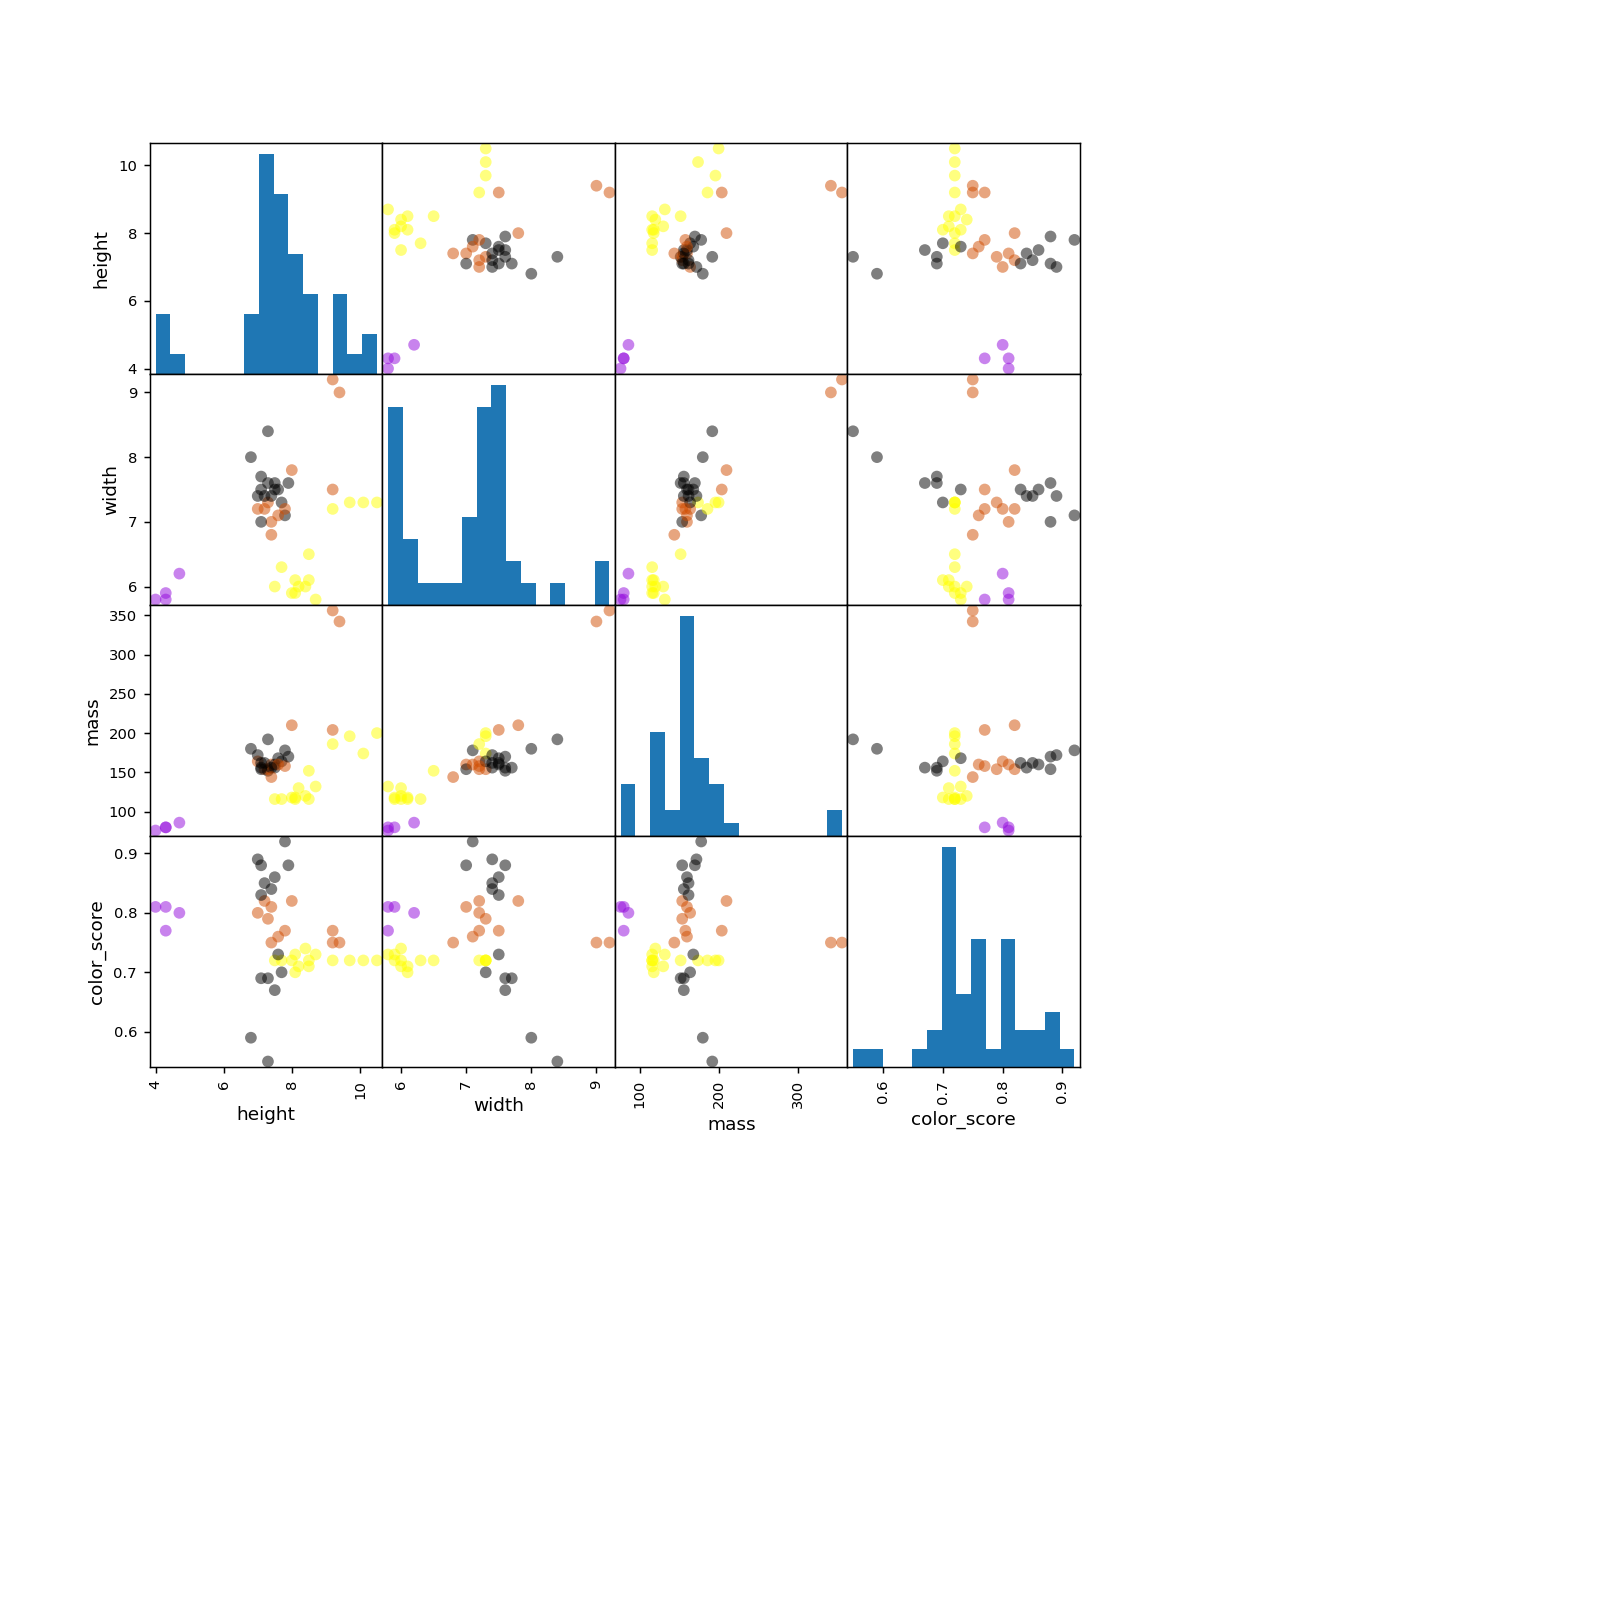

In [17]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
#cmap is colormap:  https://matplotlib.org/api/cm_api.html
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
#Feature pair Plot - Diagonal is Histogram
# Feature pair just shows the relation between 
#pairs only not all the relation between features.

<IPython.core.display.Javascript object>


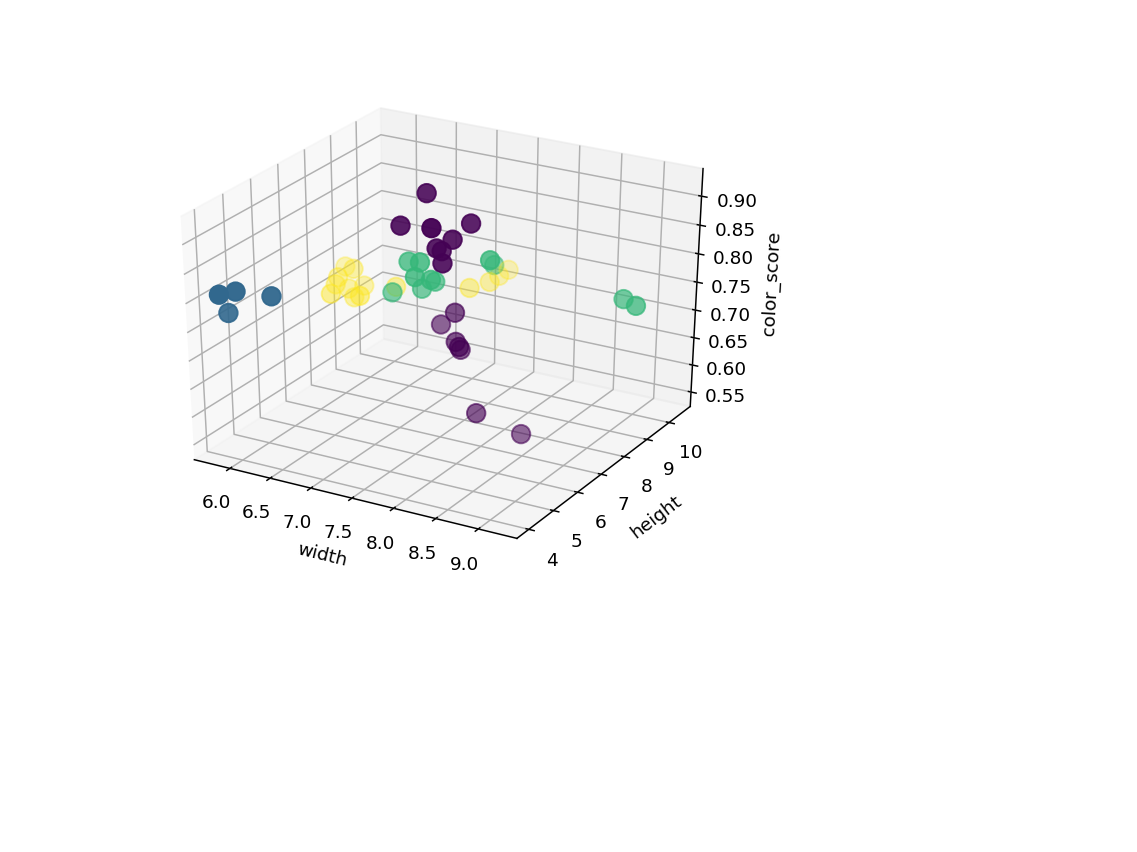

In [18]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [7]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

If we want to get the same split we should use random_state parameter. [For the documentation of train_test_split.](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) Usually we want random splitting.

### Create classifier object

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

Instance based / Memory based supervised machine learning algorithm. They memorizes the train_set examples to predict test_set values.

### Train the classifier (fit the estimator) using the training data

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [36]:
knn.score(X_test, y_test)

0.53333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [37]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

ValueError: query data dimension must match training data dimension

In [38]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

ValueError: query data dimension must match training data dimension

### Plot the decision boundaries of the k-NN classifier

In [29]:
# from adspy_shared_utilities import plot_fruit_knn

# plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


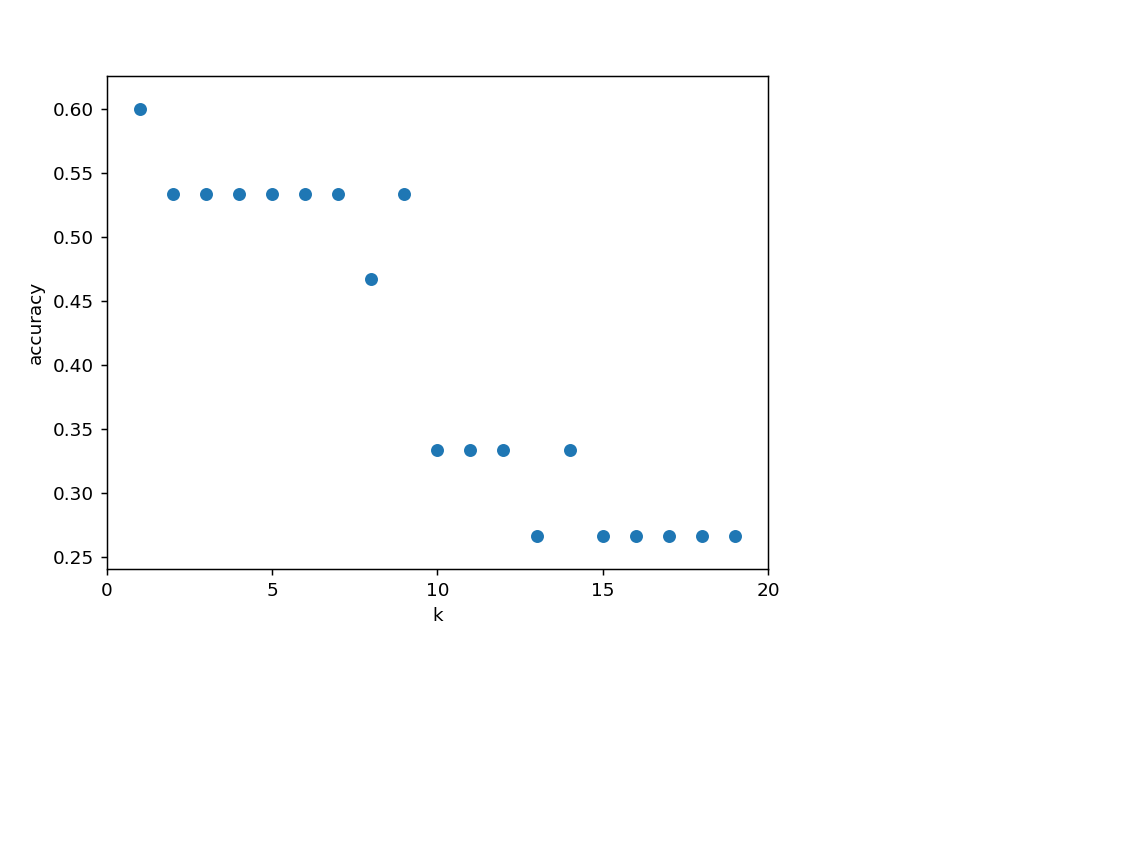

In [15]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


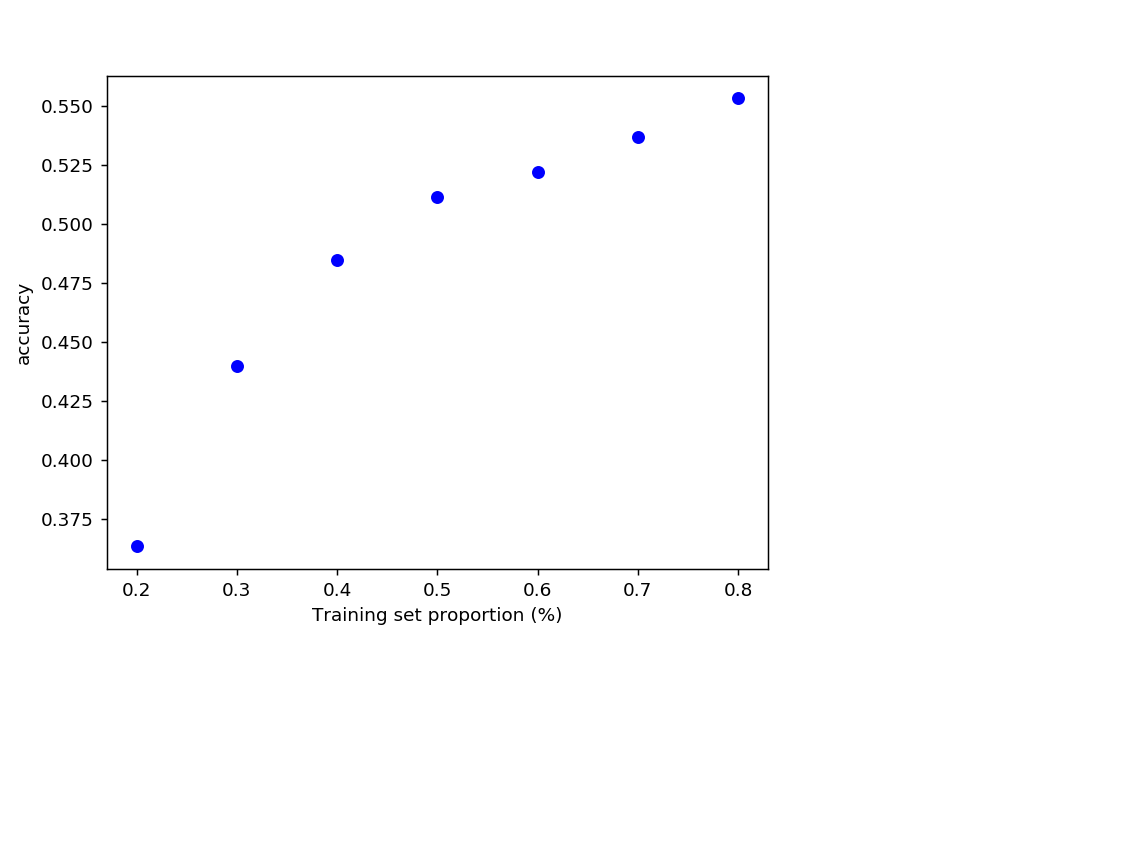

In [16]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');